> # Table of Contents
- [Introduction](#Introduction)
- [Data Cleansing](#Data-Cleansing)
- [Data Visualization](#Data-Visualization)
- [Model Training and Evaluation](#model-training-and-evaluation)
- [Neural Network Training and Evaluation](#neural-network-training-and-evaluation)
- [Conclusion](#Conclusion)

#Introduction

In this project, I predict use machine learning and deep learning techniques to predict the total number of Olympic medals a country will win.

by Nathaniel Cekay

In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix, accuracy_score
from scipy.stats import f_oneway
from fuzzywuzzy import fuzz, process
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow import keras
from tensorflow.keras import layers
from keras.regularizers import l2
pd.options.display.float_format = '{:.2f}'.format

/opt/conda/lib/python3.10/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
random.seed(42)        
np.random.seed(42)    
tf.random.set_seed(42)

In [3]:
df = pd.read_csv('/kaggle/input/olympic-dataset/gni-olympics.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   iso             93 non-null     object 
 1   ioc             93 non-null     object 
 2   name            93 non-null     object 
 3   continent       88 non-null     object 
 4   population      93 non-null     int64  
 5   gdp             93 non-null     int64  
 6   olympics_index  91 non-null     float64
 7   sports_index    91 non-null     float64
 8   olympicsIndex   93 non-null     float64
 9   sportsIndex     93 non-null     float64
 10  total           93 non-null     int64  
 11  gold            93 non-null     int64  
 12  silver          93 non-null     int64  
 13  bronze          93 non-null     int64  
dtypes: float64(4), int64(6), object(4)
memory usage: 10.3+ KB


#Data-Cleansing

In [5]:
missing = df.isna().sum()

print(missing)

iso               0
ioc               0
name              0
continent         5
population        0
gdp               0
olympics_index    2
sports_index      2
olympicsIndex     0
sportsIndex       0
total             0
gold              0
silver            0
bronze            0
dtype: int64


In [6]:
df.describe()

,population,gdp,olympics_index,sports_index,olympicsIndex,sportsIndex,total,gold,silver,bronze
count,93.00,93.00,91.00,91.00,93.00,93.00,93.00,93.00,93.00,93.00
mean,66392366.72,866840997410.71,20.68,16.33,20.23,15.98,11.61,3.66,3.63,4.32
std,205747405.60,2702387141886.76,12.63,8.93,12.85,9.15,19.09,7.02,6.63,6.21
min,33938.00,0.00,1.00,7.40,0.00,0.00,1.00,0.00,0.00,0.00
25%,4994724.00,43697659275.00,12.69,10.82,12.21,10.61,2.00,0.00,0.00,1.00
50%,11326616.00,169835426427.00,18.78,13.93,18.21,13.89,4.00,1.00,1.00,2.00
75%,47351567.00,515332499628.00,26.10,19.02,26.04,18.98,11.00,3.00,4.00,5.00
max,1402112000.00,20936600000000.00,100.00,72.23,100.00,72.23,113.00,39.00,41.00,33.00


In [7]:
df['olympics_index'] = df['olympics_index'].fillna(df['olympics_index'].mean())

In [8]:
df['sports_index'] = df['sports_index'].fillna(df['sports_index'].mean())

In [9]:
df['continent'] = df['continent'].fillna(df['continent'].mode()[0])

In [10]:
missing = df.isna().sum()

print(missing)

iso               0
ioc               0
name              0
continent         0
population        0
gdp               0
olympics_index    0
sports_index      0
olympicsIndex     0
sportsIndex       0
total             0
gold              0
silver            0
bronze            0
dtype: int64


In [11]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
unique_values = {col: df[col].unique() for col in categorical_columns}
unique_values

{'iso': array(['ARG', 'ARM', 'AUS', 'AUT', 'AZE', 'BEL', 'BFA', 'BGR', 'BHR',
        'BHS', 'BLR', 'BMU', 'BRA', 'BWA', 'CAN', 'CHE', 'CHN', 'CIV',
        'COL', 'CUB', 'CZE', 'DEU', 'DNK', 'DOM', 'ECU', 'EGY', 'ESP',
        'EST', 'ETH', 'FIN', 'FJI', 'FRA', 'GBR', 'GEO', 'GHA', 'GRC',
        'GRD', 'HKG', 'HRV', 'HUN', 'IDN', 'IND', 'IRL', 'IRN', 'ISR',
        'ITA', 'JAM', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KOR', 'KWT',
        'LTU', 'LVA', 'MAR', 'MDA', 'MEX', 'MKD', 'MNG', 'MYS', 'NAM',
        'NGA', 'NLD', 'NOR', 'NZL', 'PHL', 'POL', 'PRI', 'PRT', 'QAT',
        'ROU', 'RUS', 'SAU', 'SMR', 'SRB', 'SVK', 'SVN', 'SWE', 'SYR',
        'THA', 'TKM', 'TUN', 'TUR', 'TWN', 'UGA', 'UKR', 'USA', 'UZB',
        'VEN', 'XKX', 'ZAF'], dtype=object),
 'ioc': array(['ARG', 'ARM', 'AUS', 'AUT', 'AZE', 'BEL', 'BUR', 'BUL', 'BRN',
        'BAH', 'BLR', 'BER', 'BRA', 'BOT', 'CAN', 'SUI', 'CHN', 'CIV',
        'COL', 'CUB', 'CZE', 'GER', 'DEN', 'DOM', 'ECU', 'EGY', 'ESP',
        'EST', 'ET

In [12]:
column_values = df['name'].dropna().unique()
similar_values = {}

for value in column_values:
    matches = process.extract(value, column_values, scorer=fuzz.ratio, limit=5)
    similar_values[value] = [match[0] for match in matches if match[1] > 80 and match[0] != value]

similar_values

{'Argentina': [],
 'Armenia': [],
 'Australia': ['Austria'],
 'Austria': ['Australia'],
 'Azerbaijan': [],
 'Belgium': [],
 'Burkina Faso': [],
 'Bulgaria': [],
 'Bahrain': [],
 'Bahamas': [],
 'Belarus': [],
 'Bermuda': [],
 'Brazil': [],
 'Botswana': [],
 'Canada': [],
 'Switzerland': [],
 'China': [],
 "Côte d'Ivoire": [],
 'Colombia': [],
 'Cuba': [],
 'Czech Republic': [],
 'Germany': [],
 'Denmark': [],
 'Dominican Republic': [],
 'Ecuador': [],
 'Egypt': [],
 'Spain': [],
 'Estonia': [],
 'Ethiopia': [],
 'Finland': [],
 'Fiji': [],
 'France': [],
 'Great Britain': [],
 'Georgia': [],
 'Ghana': [],
 'Greece': [],
 'Grenada': [],
 'Hong Kong, China': [],
 'Croatia': [],
 'Hungary': [],
 'Indonesia': [],
 'India': [],
 'Ireland': [],
 'Iran': [],
 'Israel': [],
 'Italy': [],
 'Jamaica': [],
 'Jordan': [],
 'Japan': [],
 'Kazakhstan': [],
 'Kenya': [],
 'Kyrgyzstan': [],
 'South Korea': [],
 'Kuwait': [],
 'Lithuania': [],
 'Latvia': [],
 'Morocco': [],
 'Moldova': [],
 'Mexico': [

In [13]:
df.head()

,iso,ioc,name,continent,population,gdp,olympics_index,sports_index,olympicsIndex,sportsIndex,total,gold,silver,bronze
0,ARG,ARG,Argentina,South America,45376763,383066977654,19.60,9.32,19.60,9.32,3,0,1,2
1,ARM,ARM,Armenia,Asia,2963234,12645459214,19.68,13.50,19.68,13.50,4,0,2,2
2,AUS,AUS,Australia,Oceania,25687041,1330900925057,31.17,11.07,31.17,11.07,46,17,7,22
3,AUT,AUT,Austria,Europe,8917205,428965397959,12.21,15.92,12.21,15.92,7,1,1,5
4,AZE,AZE,Azerbaijan,Europe,10110116,42607176471,18.21,13.10,18.21,13.10,7,0,3,4


Dropping irrelevant columns. I will predict the total medal count. 

In [14]:
df = df.drop(columns=['iso', 'ioc', 'gold', 'silver', 'bronze'])

In [15]:
df

,name,continent,population,gdp,olympics_index,sports_index,olympicsIndex,sportsIndex,total
0,Argentina,South America,45376763,383066977654,19.60,9.32,19.60,9.32,3
1,Armenia,Asia,2963234,12645459214,19.68,13.50,19.68,13.50,4
2,Australia,Oceania,25687041,1330900925057,31.17,11.07,31.17,11.07,46
3,Austria,Europe,8917205,428965397959,12.21,15.92,12.21,15.92,7
4,Azerbaijan,Europe,10110116,42607176471,18.21,13.10,18.21,13.10,7
...,...,...,...,...,...,...,...,...,...
88,United States,North America,329484123,20936600000000,26.16,9.79,26.16,9.79,113
89,Uzbekistan,Asia,34232050,57707189945,24.83,11.63,24.83,11.63,5
90,Venezuela,South America,28435943,482400000000,25.13,10.63,25.13,10.63,4
91,Kosovo,Europe,1775378,7611402165,7.98,22.47,7.98,22.47,2


#Data-Visualization

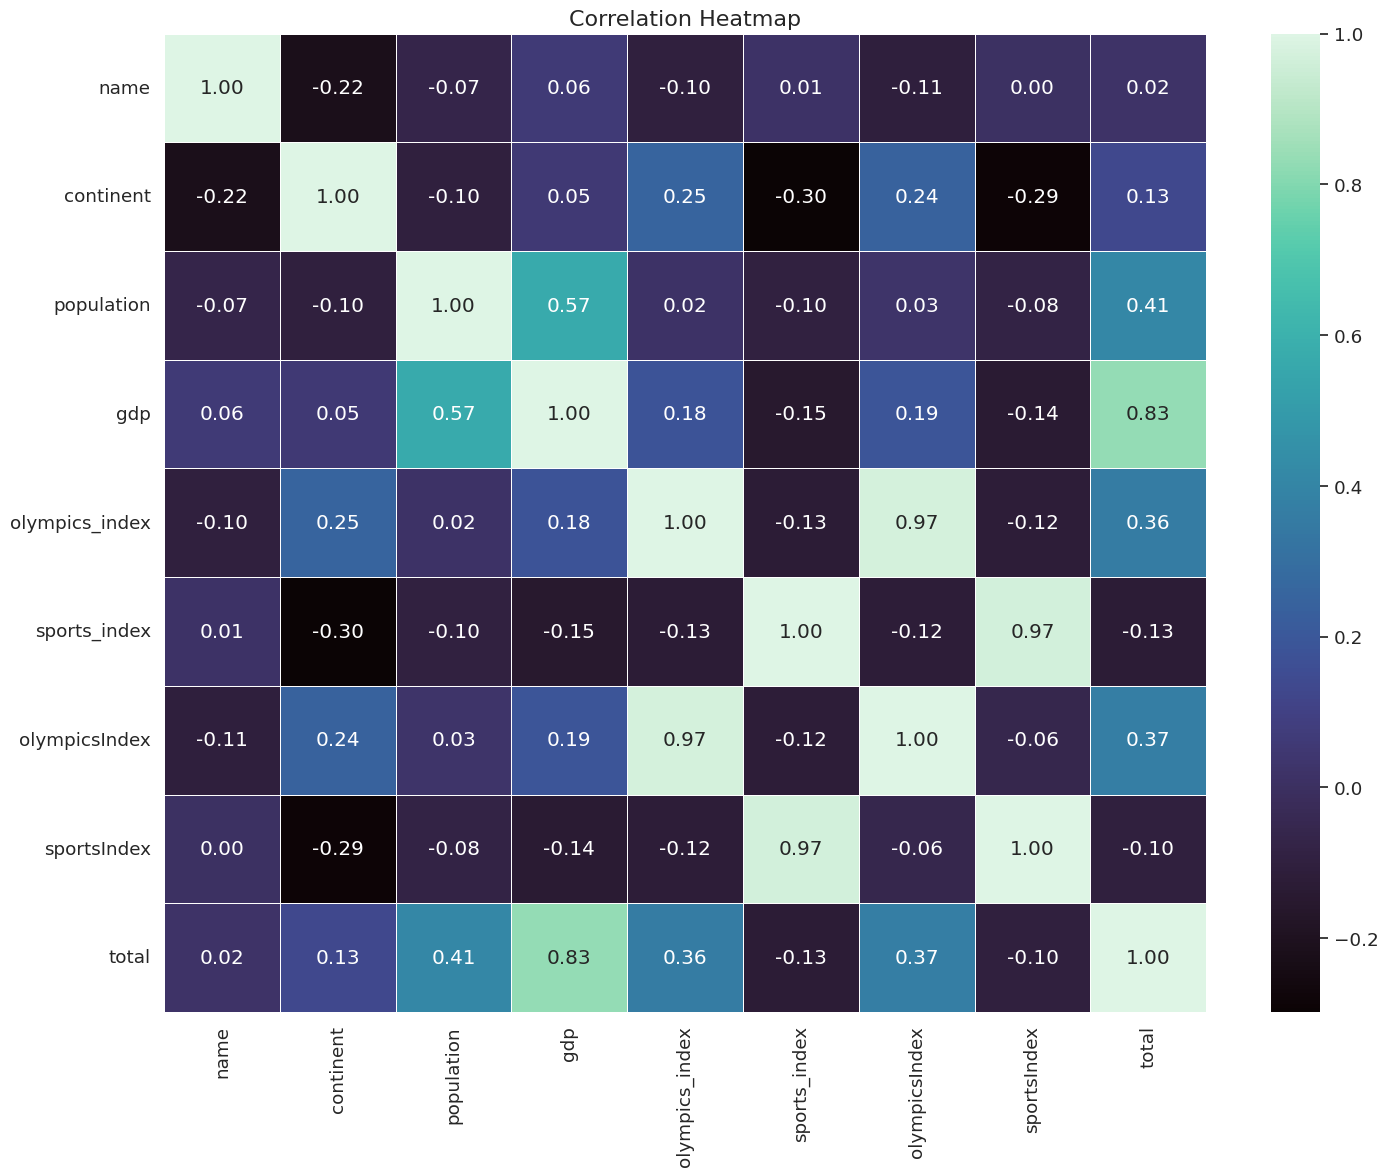

In [16]:
hm_df = df.copy()

cat_col = hm_df.select_dtypes(include=['object']).columns.tolist()
label_encoder = LabelEncoder()

for col in cat_col:
    hm_df[col] = label_encoder.fit_transform(df[col])

plt.figure(figsize=(15, 12))
sns.set(font_scale=1.2) 

cm = sns.heatmap(
    hm_df.corr(),
    annot=True,
    cmap='mako',  
    fmt='.2f', 
    linewidths=0.5 
)


plt.title('Correlation Heatmap', fontsize=16)
plt.tight_layout()  
plt.show()

In [17]:
df.describe()

,population,gdp,olympics_index,sports_index,olympicsIndex,sportsIndex,total
count,93.00,93.00,93.00,93.00,93.00,93.00,93.00
mean,66392366.72,866840997410.71,20.68,16.33,20.23,15.98,11.61
std,205747405.60,2702387141886.76,12.49,8.84,12.85,9.15,19.09
min,33938.00,0.00,1.00,7.40,0.00,0.00,1.00
25%,4994724.00,43697659275.00,13.09,11.02,12.21,10.61,2.00
50%,11326616.00,169835426427.00,18.79,13.99,18.21,13.89,4.00
75%,47351567.00,515332499628.00,26.04,18.98,26.04,18.98,11.00
max,1402112000.00,20936600000000.00,100.00,72.23,100.00,72.23,113.00


In [18]:
numerical_data = df.select_dtypes(include=['number'])

print(numerical_data)

    population             gdp  olympics_index  sports_index  olympicsIndex  \
0     45376763    383066977654           19.60          9.32          19.60   
1      2963234     12645459214           19.68         13.50          19.68   
2     25687041   1330900925057           31.17         11.07          31.17   
3      8917205    428965397959           12.21         15.92          12.21   
4     10110116     42607176471           18.21         13.10          18.21   
..         ...             ...             ...           ...            ...   
88   329484123  20936600000000           26.16          9.79          26.16   
89    34232050     57707189945           24.83         11.63          24.83   
90    28435943    482400000000           25.13         10.63          25.13   
91     1775378      7611402165            7.98         22.47           7.98   
92    59308690    301923639270           11.49         14.05          11.49   

    sportsIndex  total  
0          9.32      3  
1

In [19]:
print("\n Skewness")
print(numerical_data.skew())
print("\n Kurtosis")
print(numerical_data.kurt())


 Skewness
population       5.96
gdp              6.10
olympics_index   3.07
sports_index     3.22
olympicsIndex    2.83
sportsIndex      2.89
total            3.22
dtype: float64

 Kurtosis
population       36.84
gdp              40.31
olympics_index   16.93
sports_index     16.71
olympicsIndex    15.34
sportsIndex      14.81
total            11.61
dtype: float64


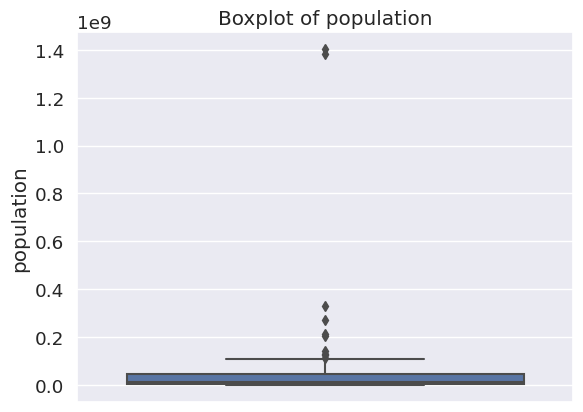

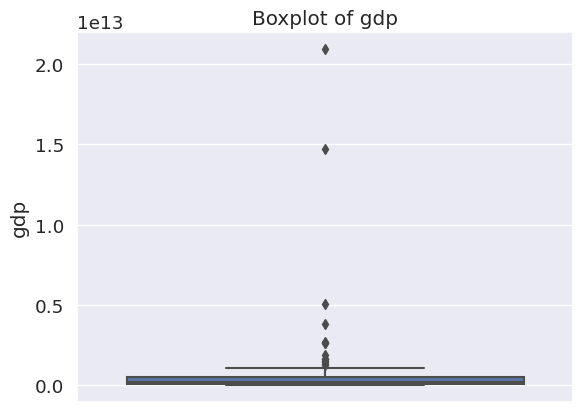

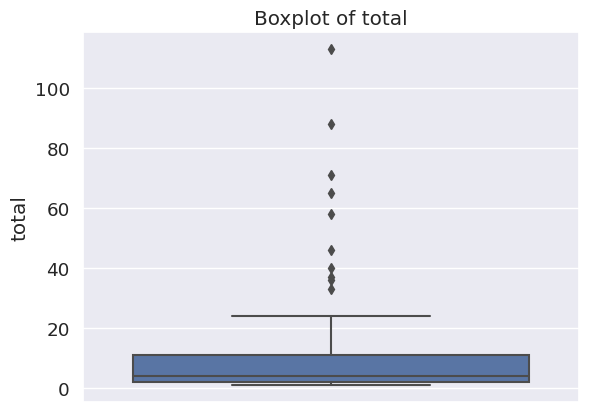

In [20]:
variables = ['population', 'gdp', 'total']
for var in variables:
    sns.boxplot(data=df, y=var)
    plt.title(f'Boxplot of {var}')
    plt.show()

Though there were outliers, they would mostly be from very large countries, which are very relevant to the final medal total. These outliers will not be removed because it would dramatically reduce model performance. 

In [21]:
missing = df.isna().sum()

print(missing)

name              0
continent         0
population        0
gdp               0
olympics_index    0
sports_index      0
olympicsIndex     0
sportsIndex       0
total             0
dtype: int64


In [22]:
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

In [23]:
print(np.isinf(df[numerical_columns]).sum())

population        0
gdp               0
olympics_index    0
sports_index      0
olympicsIndex     0
sportsIndex       0
total             0
dtype: int64


In [24]:
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [25]:
df = pd.get_dummies(df, columns=['continent'], drop_first=True)

In [26]:
df.head()

,name,population,gdp,olympics_index,sports_index,olympicsIndex,sportsIndex,total,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
0,Argentina,0.03,0.02,0.19,0.03,0.20,0.13,0.02,False,False,False,False,True
1,Armenia,0.00,0.00,0.19,0.09,0.20,0.19,0.03,True,False,False,False,False
2,Australia,0.02,0.06,0.30,0.06,0.31,0.15,0.40,False,False,False,True,False
3,Austria,0.01,0.02,0.11,0.13,0.12,0.22,0.05,False,True,False,False,False
4,Azerbaijan,0.01,0.00,0.17,0.09,0.18,0.18,0.05,False,True,False,False,False


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     93 non-null     object 
 1   population               93 non-null     float64
 2   gdp                      93 non-null     float64
 3   olympics_index           93 non-null     float64
 4   sports_index             93 non-null     float64
 5   olympicsIndex            93 non-null     float64
 6   sportsIndex              93 non-null     float64
 7   total                    93 non-null     float64
 8   continent_Asia           93 non-null     bool   
 9   continent_Europe         93 non-null     bool   
 10  continent_North America  93 non-null     bool   
 11  continent_Oceania        93 non-null     bool   
 12  continent_South America  93 non-null     bool   
dtypes: bool(5), float64(7), object(1)
memory usage: 6.4+ KB


#model-training-and-evaluation

In [28]:
X = df.drop(columns=['total', 'name']).values
X = X.astype(float)
y = df[['total']]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

In [30]:
model_rf = RandomForestRegressor(n_estimators = 10, random_state = 42)
model_rf.fit(X_train, y_train.values.ravel())

RandomForestRegressor(n_estimators=10, random_state=42)

In [31]:
y_pred = model_rf.predict(X_test)
y_pred

array([0.01875   , 0.00982143, 0.03392857, 0.01785714, 0.02142857,
       0.42946429, 0.01428571, 0.3875    , 0.02589286, 0.03660714,
       0.04375   , 0.0625    , 0.13660714, 0.05446429, 0.06071429,
       0.11071429, 0.03214286, 0.02142857, 0.03571429])

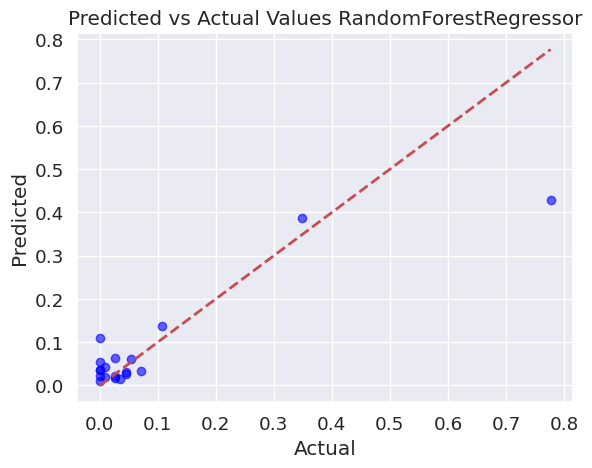

In [32]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) 
plt.title("Predicted vs Actual Values RandomForestRegressor")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

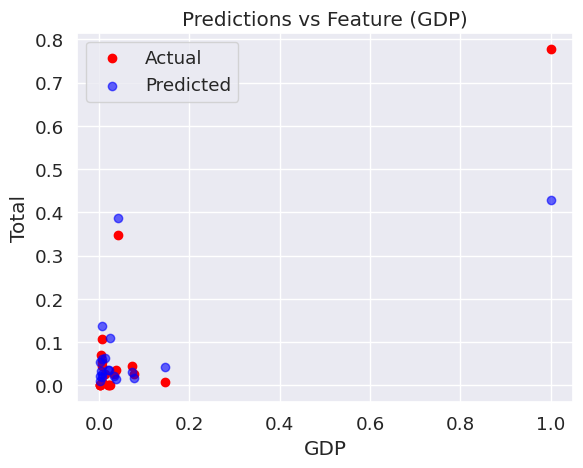

In [33]:
plt.scatter(X_test[:, 0], y_test, color='red', label='Actual') 
plt.scatter(X_test[:, 0], y_pred, color='blue', label='Predicted', alpha=0.6)
plt.title("Predictions vs Feature (GDP)")
plt.xlabel("GDP")
plt.ylabel("Total")
plt.legend()
plt.show()

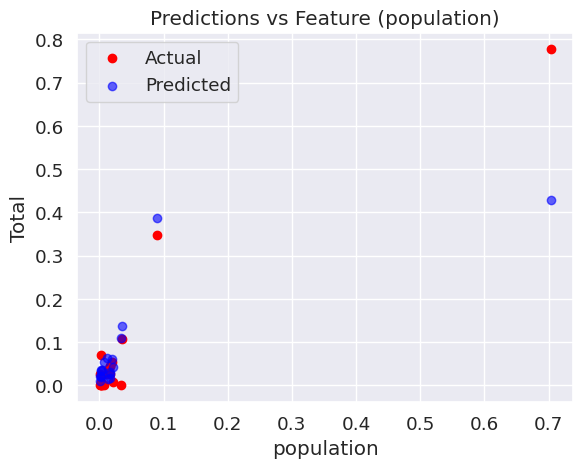

In [34]:
plt.scatter(X_test[:, 1], y_test, color='red', label='Actual')  
plt.scatter(X_test[:, 1], y_pred, color='blue', label='Predicted', alpha=0.6)
plt.title("Predictions vs Feature (population)")
plt.xlabel("population")
plt.ylabel("Total")
plt.legend()
plt.show()

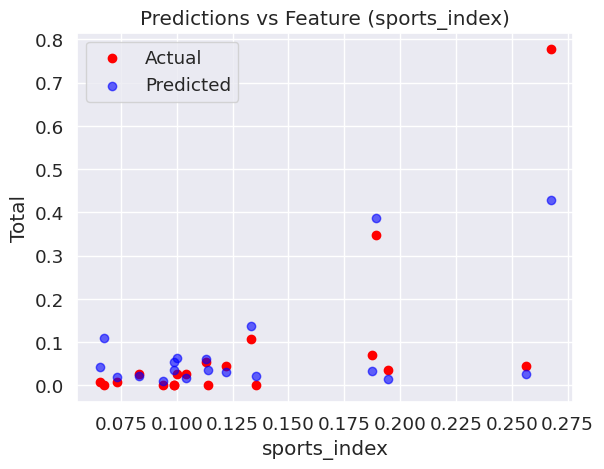

In [35]:
plt.scatter(X_test[:, 2], y_test, color='red', label='Actual')  
plt.scatter(X_test[:, 2], y_pred, color='blue', label='Predicted', alpha=0.6)
plt.title("Predictions vs Feature (sports_index)")
plt.xlabel("sports_index")
plt.ylabel("Total")
plt.legend()
plt.show()

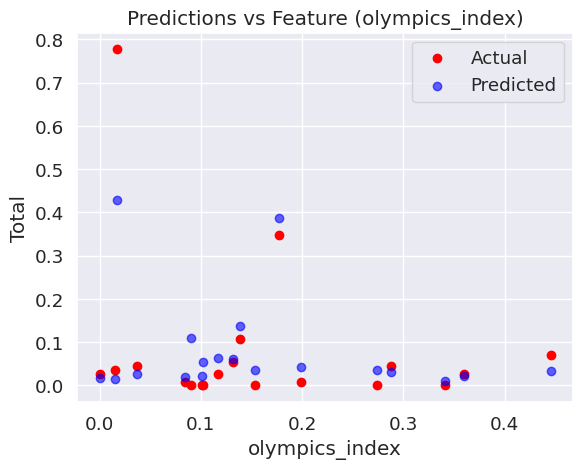

In [36]:
plt.scatter(X_test[:, 3], y_test, color='red', label='Actual')  
plt.scatter(X_test[:, 3], y_pred, color='blue', label='Predicted', alpha=0.6)
plt.title("Predictions vs Feature (olympics_index)")
plt.xlabel("olympics_index")
plt.ylabel("Total")
plt.legend()
plt.show()

In [37]:
rmse_rf = mean_squared_error(y_test, y_pred, squared=False)  

r2_rf = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error with RandomForestRegressor(RMSE): {rmse_rf}")
print(f"R² Score: {r2_rf}")

Root Mean Squared Error with RandomForestRegressor(RMSE): 0.08782642044905202
R² Score: 0.7637049965499045


In [38]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [39]:
y_pred = model_lr.predict(X_test)
y_pred

array([[-0.01163237],
       [ 0.00816771],
       [ 0.08487082],
       [ 0.01037651],
       [ 0.0057885 ],
       [ 0.78542764],
       [ 0.02877242],
       [ 0.17724892],
       [ 0.05543511],
       [ 0.05576665],
       [ 0.01578901],
       [ 0.06569233],
       [ 0.10192105],
       [ 0.00086187],
       [ 0.07930642],
       [ 0.02086313],
       [ 0.03176914],
       [ 0.00612585],
       [ 0.0155867 ]])

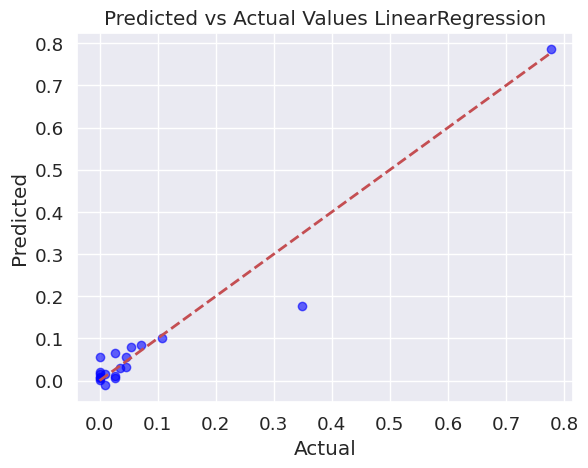

In [40]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  
plt.title("Predicted vs Actual Values LinearRegression")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [41]:
rmse_lr = mean_squared_error(y_test, y_pred, squared=False)  

r2_lr = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error with LinearRegression (RMSE): {rmse_lr}")
print(f"R² Score: {r2_lr}")

Root Mean Squared Error with LinearRegression (RMSE): 0.04418340208884161
R² Score: 0.9401970676242175


In [42]:
model_dt = DecisionTreeRegressor(random_state=42) 
model_dt.fit(X_train, y_train) 

DecisionTreeRegressor(random_state=42)

In [43]:
y_pred = model_dt.predict(X_test)

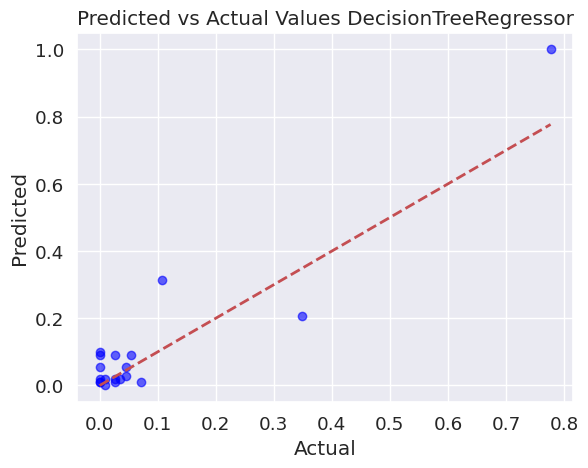

In [44]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) 
plt.title("Predicted vs Actual Values DecisionTreeRegressor")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [45]:
rmse_dt = mean_squared_error(y_test, y_pred, squared=False)
r2_dt = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error with DecisionTreeRegressor (RMSE): {rmse_dt}")
print(f"R² Score: {r2_dt}")

Root Mean Squared Error with DecisionTreeRegressor (RMSE): 0.08697672287591753
R² Score: 0.7682550635223445


#neural-network-training-and-evaluation

In [46]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
model_nn = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1)
])

In [48]:
model_nn.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

model_nn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,289 (173.00 KB)

 Trainable params: 44,289 (173.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 185ms/step - loss: 0.0585 - mae: 0.1680 - val_loss: 0.1310 - val_mae: 0.1981
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0243 - mae: 0.1104 - val_loss: 0.1052 - val_mae: 0.1813
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0274 - mae: 0.1167 - val_loss: 0.0644 - val_mae: 0.1255
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0183 - mae: 0.1046 - val_loss: 0.0549 - val_mae: 0.1094
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0345 - mae: 0.1272 - val_loss: 0.0552 - val_mae: 0.1142
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0150 - mae: 0.0974 - val_loss: 0.0625 - val_mae: 0.1257
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0209 - mae: 0.1093 - val_loss: 0.0718 - val_mae: 0.1406
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0199 - mae: 0.1034 - val_loss: 0.0702 - val_mae: 0.1401
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0209 - mae: 0.1040 -

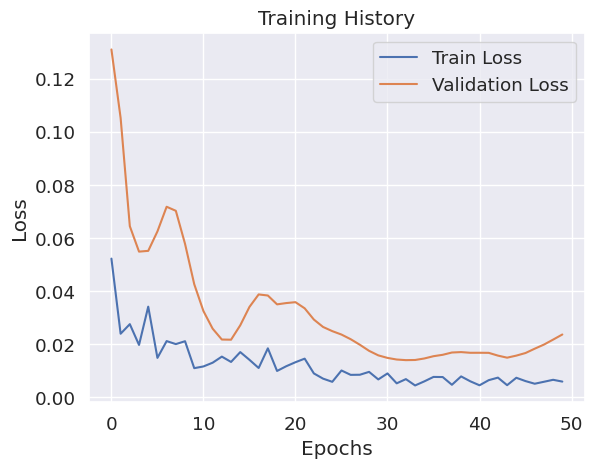

In [49]:
history = model_nn.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [50]:
y_pred = model_nn.predict(X_test)

rmse_nn = mean_squared_error(y_test, y_pred, squared=False)
r2_nn = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse_nn}")
print(f"R² Score: {r2_nn}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Root Mean Squared Error (RMSE): 0.08818052228510254
R² Score: 0.7617957493988996


In [51]:
results = pd.DataFrame({
    "Model": ["Random Forest Model", "Linear Regression Model", "Decision Tree Model", "Neural Network Model"],
    "RMSE": [rmse_rf, rmse_lr, rmse_dt, rmse_nn],
    "R² Score": [r2_rf, r2_lr, r2_dt, r2_nn]
})

print(results)

                     Model  RMSE  R² Score
0      Random Forest Model  0.09      0.76
1  Linear Regression Model  0.04      0.94
2      Decision Tree Model  0.09      0.77
3     Neural Network Model  0.09      0.76


The Linear Regression Model was the best-performing model, with an RMSE of 0.04 and an r-squared score of 0.94. This dataset most likely wasn't large enough for the neural network to perform well. 

In [52]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

In [53]:
model_nn2 = Sequential([
    Input(shape=(X_train.shape[1],)), 
    Dense(128, activation='relu'),
    Dropout(0.3),  
    Dense(64, activation='relu'),
    Dropout(0.2), 
    Dense(32, activation='relu'),
    Dense(1)  
])

In my second neural network model I used less neurons for a smaller model, the smaller model was better able to fit the data

In [54]:
model_nn2.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

model_nn2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,905 (46.50 KB)

 Trainable params: 11,905 (46.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 184ms/step - loss: 0.2780 - mae: 0.3847 - val_loss: 0.0560 - val_mae: 0.1607
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1292 - mae: 0.2501 - val_loss: 0.0923 - val_mae: 0.2020
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0747 - mae: 0.1926 - val_loss: 0.1577 - val_mae: 0.2416
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0574 - mae: 0.1618 - val_loss: 0.2126 - val_mae: 0.2651
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0533 - mae: 0.1615 - val_loss: 0.2461 - val_mae: 0.2769
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0551 - mae: 0.1678 - val_loss: 0.2454 - val_mae: 0.2682
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0461 - mae: 0.1527 - val_loss: 0.2321 - val_mae: 0.2523
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0472 - mae: 0.1527 - val_loss: 0.2122 - val_mae: 0.2339
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0337 - mae: 0.1455 -

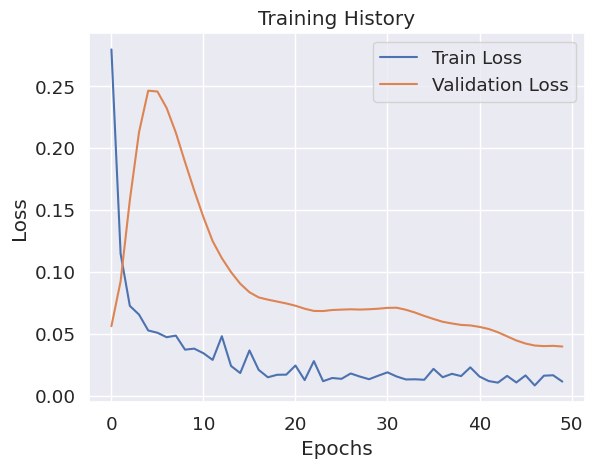

In [55]:
history = model_nn2.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [56]:
y_pred = model_nn2.predict(X_test)

rmse_nn2 = mean_squared_error(y_test, y_pred, squared=False)
r2_nn2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse_nn2}")
print(f"R² Score: {r2_nn2}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Root Mean Squared Error (RMSE): 0.06838119550724928
R² Score: 0.8567556332208457


In [57]:
results2 = pd.DataFrame({
    "Model": ["Neural Network Model", "Neural Network Model 2"],
    "RMSE": [rmse_nn, rmse_nn2],
    "R² Score": [r2_nn, r2_nn2]
})

print(results2)

                    Model  RMSE  R² Score
0    Neural Network Model  0.09      0.76
1  Neural Network Model 2  0.07      0.86


In [58]:
results3 = pd.DataFrame({
    "Model": ["Random Forest Model", "Linear Regression Model", "Decision Tree Model", "Neural Network Model", "Neural Network Model 2"],
    "RMSE": [rmse_rf, rmse_lr, rmse_dt, rmse_nn, rmse_nn2],
    "R² Score": [r2_rf, r2_lr, r2_dt, r2_nn, r2_nn2]
})

print(results3)

                     Model  RMSE  R² Score
0      Random Forest Model  0.09      0.76
1  Linear Regression Model  0.04      0.94
2      Decision Tree Model  0.09      0.77
3     Neural Network Model  0.09      0.76
4   Neural Network Model 2  0.07      0.86


In [59]:
df.head()

,name,population,gdp,olympics_index,sports_index,olympicsIndex,sportsIndex,total,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
0,Argentina,0.03,0.02,0.19,0.03,0.20,0.13,0.02,False,False,False,False,True
1,Armenia,0.00,0.00,0.19,0.09,0.20,0.19,0.03,True,False,False,False,False
2,Australia,0.02,0.06,0.30,0.06,0.31,0.15,0.40,False,False,False,True,False
3,Austria,0.01,0.02,0.11,0.13,0.12,0.22,0.05,False,True,False,False,False
4,Azerbaijan,0.01,0.00,0.17,0.09,0.18,0.18,0.05,False,True,False,False,False


In [60]:
X = df[['population', 'gdp', 'olympics_index', 'olympicsIndex']]
X = X.astype(float)
y = df[['total']]

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

In [62]:
model_lr2 = LinearRegression()
model_lr2.fit(X_train, y_train)

LinearRegression()

In [63]:
y_pred = model_lr2.predict(X_test)
y_pred

array([[0.02411943],
       [0.02836949],
       [0.05548183],
       [0.04305874],
       [0.02435665],
       [0.75103964],
       [0.06614424],
       [0.14720953],
       [0.08906713],
       [0.0310134 ],
       [0.03081708],
       [0.04141431],
       [0.07654694],
       [0.03609433],
       [0.05474475],
       [0.05483402],
       [0.04842471],
       [0.04110718],
       [0.03539706]])

In [64]:
rmse_lr2 = mean_squared_error(y_test, y_pred, squared=False)  

r2_lr2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error with LinearRegression (RMSE): {rmse_lr2}")
print(f"R² Score: {r2_lr2}")

Root Mean Squared Error with LinearRegression (RMSE): 0.05399069770953171
R² Score: 0.9107019340370559


In [65]:
results4 = pd.DataFrame({
    "Model": ["Random Forest Model", "Linear Regression Model", "Decision Tree Model", "Neural Network Model", "Neural Network Model 2", "Linear Regression Model 2"],
    "RMSE": [rmse_rf, rmse_lr, rmse_dt, rmse_nn, rmse_nn2, rmse_lr2],
    "R² Score": [r2_rf, r2_lr, r2_dt, r2_nn, r2_nn2, r2_lr2]
})

print(results4)

                       Model  RMSE  R² Score
0        Random Forest Model  0.09      0.76
1    Linear Regression Model  0.04      0.94
2        Decision Tree Model  0.09      0.77
3       Neural Network Model  0.09      0.76
4     Neural Network Model 2  0.07      0.86
5  Linear Regression Model 2  0.05      0.91


#Conclusion

Rerunning the best-performing model with just the features 'population', 'gdp', 'olympics_index', and 'olympicsIndex', decreased performance slightly. The more robust original model performed better on the smaller dataset. Overall the first linear regression model performed the best. The neural network models had slightly weaker performance, likely because this analysis used a smaller dataset. GDP and population were the most important factors for predicting the total amount of medals won, but features with less importance were relevant as well. 